In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../_data/card_transdata.csv')

In [4]:
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [5]:
data.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [6]:
data['fraud'].value_counts()/data.shape[0]*100

0.0    91.2597
1.0     8.7403
Name: fraud, dtype: float64

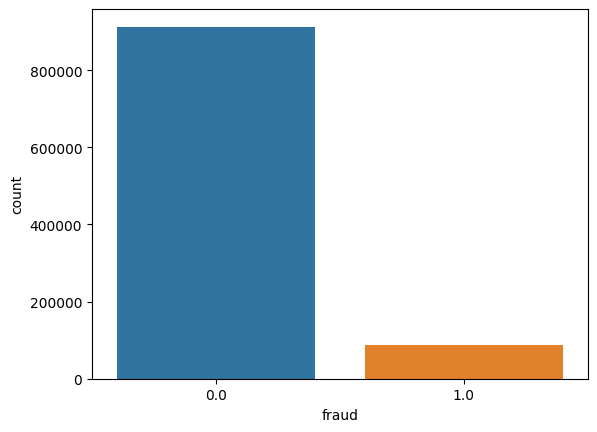

In [7]:
sns.countplot(x='fraud', data=data);

In [8]:
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler as ROS
from imblearn.under_sampling import RandomUnderSampler as RUS

In [9]:
X = data.drop(columns=['fraud'])
y = data['fraud']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [11]:
X_train[y_train==1].shape[0]/X_train.shape[0] * 100

8.739166666666668

In [12]:
X_train[y_train==1].shape[0]/X_train[y_train==0].shape[0]

0.09576032069252052

In [13]:
ros = ROS(sampling_strategy=35/65)
rus = RUS(sampling_strategy=35/65)
smote = SMOTE(sampling_strategy=35/65)

In [14]:
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_smote['repeat_retailer'] = np.round(X_train_smote['repeat_retailer'])
X_train_smote['used_chip'] = np.round(X_train_smote['used_chip'])
X_train_smote['used_pin_number'] = np.round(X_train_smote['used_pin_number'])
X_train_smote['online_order'] = np.round(X_train_smote['online_order'])

In [15]:
X_train_ros[y_train_ros==1].shape[0]/X_train_ros.shape[0] * 100

34.999946581640465

In [16]:
X_train_ros[y_train_ros==1].shape[0]/X_train_ros[y_train_ros==0].shape[0] * 100

53.84602741227069

In [17]:
X_train_rus.shape[0], X_train_ros.shape[0], X_train_smote.shape[0]

(149814, 842407, 842407)

In [24]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, recall_score, precision_score, f1_score

In [25]:
# rfc_ros = RFC(n_estimators=10).fit(X_train_ros, y_train_ros)
# rfc_rus = RFC(n_estimators=10).fit(X_train_rus, y_train_rus)
# rfc_smote = RFC(n_estimators=10).fit(X_train_smote, y_train_smote)

nb_ros = GaussianNB().fit(X_train_ros, y_train_ros)
nb_rus = GaussianNB().fit(X_train_rus, y_train_rus)
nb_smote = GaussianNB().fit(X_train_smote, y_train_smote)

In [20]:
print(classification_report(y_true=y_test, y_pred=rfc_ros.predict(X_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    365032
         1.0       1.00      1.00      1.00     34968

    accuracy                           1.00    400000
   macro avg       1.00      1.00      1.00    400000
weighted avg       1.00      1.00      1.00    400000



In [26]:
print(classification_report(y_true=y_test, y_pred=nb_ros.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98    365032
         1.0       0.73      0.91      0.81     34968

    accuracy                           0.96    400000
   macro avg       0.86      0.94      0.89    400000
weighted avg       0.97      0.96      0.96    400000



In [21]:
print(classification_report(y_true=y_test, y_pred=rfc_rus.predict(X_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    365032
         1.0       1.00      1.00      1.00     34968

    accuracy                           1.00    400000
   macro avg       1.00      1.00      1.00    400000
weighted avg       1.00      1.00      1.00    400000



In [27]:
print(classification_report(y_true=y_test, y_pred=nb_rus.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98    365032
         1.0       0.72      0.87      0.79     34968

    accuracy                           0.96    400000
   macro avg       0.85      0.92      0.88    400000
weighted avg       0.96      0.96      0.96    400000



In [22]:
print(classification_report(y_true=y_test, y_pred=rfc_smote.predict(X_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    365032
         1.0       1.00      1.00      1.00     34968

    accuracy                           1.00    400000
   macro avg       1.00      1.00      1.00    400000
weighted avg       1.00      1.00      1.00    400000



In [28]:
print(classification_report(y_true=y_test, y_pred=nb_smote.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98    365032
         1.0       0.69      0.93      0.79     34968

    accuracy                           0.96    400000
   macro avg       0.84      0.94      0.88    400000
weighted avg       0.97      0.96      0.96    400000

